# Taller 4. Redes densamente conectadas para problemas de clasificación y de regresión
Nombres: Manuel Sanchez y Allan Ramirez

## Parte 1

### Punto 1

In [2]:
# Librerías
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords

# tensorflow y sklearn
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.datasets import imdb
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score

In [2]:
# Carga de datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Decodificación de reseñas
word_index = imdb.get_word_index()
reverse_word_index = dict ([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [3]:
print(train_data[0])
decoded_review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

El dataset de IMDB utiliza índices numéricos en lugar de las palabras originales. Es decir, cada reseña está representada por una lista de números, donde cada número corresponde a una palabra específica en el vocabulario más frecuente (hasta las 10,000 palabras más comunes).

Las matrices y vectores representan estas listas de números, es decir, cada línea es la representación numérica de una reseña.

El código sirve para convertir esas listas de índices en las palabras originales utilizando un diccionario invertido, siendo posible de esta forma obtener las reseñas originales.

Longitud promedio de las reseñas: 238.71364


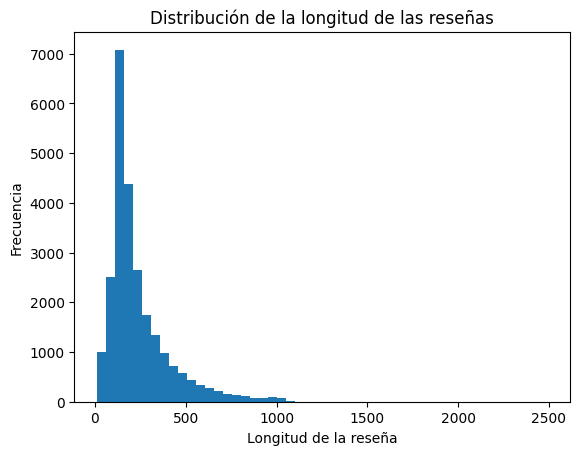

In [4]:
# Decodificar todas las reseñas de entrenamiento
def decodificar_resena(resena_codificada):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in resena_codificada])

# Decodificar todas las reseñas del conjunto de entrenamiento
todas_las_resenas = [decodificar_resena(resena) for resena in train_data]

longitud_resenas = [len(x) for x in train_data]
print(f"Longitud promedio de las reseñas: {np.mean(longitud_resenas)}")

# Distribución de las longitudes de las reseñas
import matplotlib.pyplot as plt

plt.hist(longitud_resenas, bins=50)
plt.xlabel("Longitud de la reseña")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud de las reseñas")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a_lit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


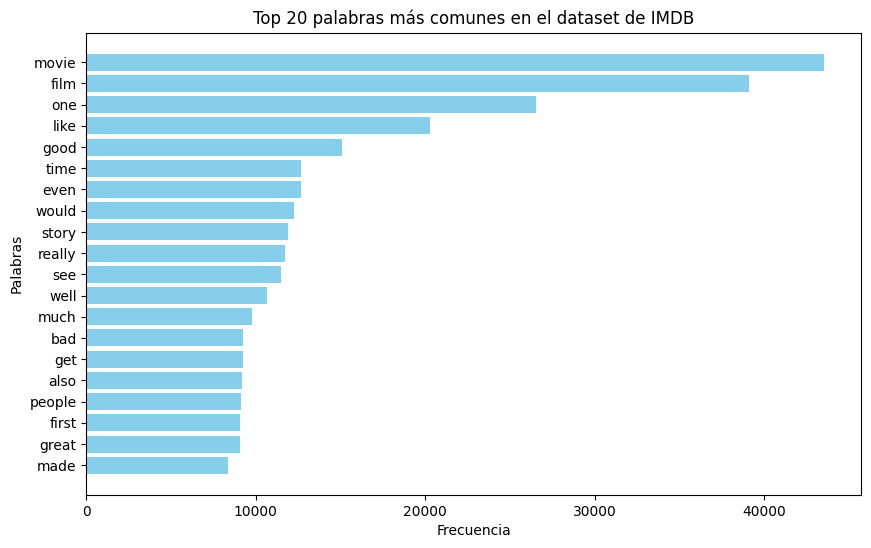

In [5]:
# Descargar las stop words de nltk
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english'))) + ['?', 'br']

# Contar las palabras más comunes
todas_las_palabras = " ".join(todas_las_resenas).split()
palabras_filtradas = [palabra for palabra in todas_las_palabras if palabra not in stop_words]

# Contar las palabras
contador_palabras = Counter(palabras_filtradas)

# Mostrar las 10 palabras más comunes
palabras_mas_comunes = contador_palabras.most_common(20)

# Preparar los datos para el gráfico
palabras, frecuencias = zip(*palabras_mas_comunes)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras, frecuencias, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 20 palabras más comunes en el dataset de IMDB')
plt.gca().invert_yaxis()  # Invertir el eje para mostrar la palabra más común en la parte superior
plt.show()


Se puede observar que las palabras más comunes después de eliminar las stop words incluyen atributos propios de las películas como "movie", "film", "story", lo que indica que los usuarios centran sus comentarios en aspectos esenciales de estas, como la trama y el título. Se observa también palabras como good, like, bad, really, great, que denotan juicios de sentimientos sobre las películas.

### Punto 2

El multihot encoder es una técnica para hacer enconding de datos categóricos en forma de vectores binarios, donde cada posición del vector indica en este caso si una palabra está o no presente en una categoría. Se trabaja principalmente en procesamiento de texto para trabajar con arreglos de tamaños fijos.

In [6]:
# Función para realizar el multi-hot encoding
def vectorizar_secuencias(secuencias, dimension=10000):
    resultados = np.zeros((len(secuencias), dimension))  # Crear una matriz de ceros
    for i, secuencia in enumerate(secuencias):
        resultados[i, secuencia] = 1.0  # Poner 1s en las posiciones correspondientes a las palabras
    return resultados

# Vectorizar el conjunto de entrenamiento y el conjunto de prueba
x_train = vectorizar_secuencias(train_data)
x_test = vectorizar_secuencias(test_data)

# Convertir las etiquetas a arrays tipo float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(f"Tamaño del conjunto de entrenamiento: {x_train.shape}")
print(f"Tamaño del conjunto de prueba: {x_test.shape}")


Tamaño del conjunto de entrenamiento: (25000, 10000)
Tamaño del conjunto de prueba: (25000, 10000)


### Punto 3

In [7]:
# Dividir el conjunto de prueba en validación y prueba
x_val, x_test, y_val, y_test = train_test_split(x_test, test_labels, test_size=0.5, random_state=42)

# Convertir las etiquetas a formato float32
y_train = np.asarray(train_labels).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [8]:
# Función para calcular las métricas
def calcular_metricas(model, x, y_true):
    y_pred = model.predict(x)
    y_pred_bin = (y_pred > 0.5).astype("float32")
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    auc = roc_auc_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred_bin)
    
    return rmse, auc, acc

# Definir las arquitecturas
arquitecturas = [
    {"capas": [16, 16], "activacion": "relu", "optimizador": RMSprop()},
    {"capas": [32, 16], "activacion": "relu", "optimizador": Adam()},
    {"capas": [16, 16, 16], "activacion": "tanh", "optimizador": SGD()},
    {"capas": [32, 16, 16], "activacion": "relu", "optimizador": RMSprop()},
    {"capas": [64, 32], "activacion": "sigmoid", "optimizador": Adam()},
    {"capas": [32, 32, 16], "activacion": "relu", "optimizador": Adam()},
    {"capas": [16, 8], "activacion": "tanh", "optimizador": RMSprop()},
    {"capas": [64, 32, 16], "activacion": "sigmoid", "optimizador": SGD()},
]

# Tabla para almacenar resultados
resultados = []

# Entrenar los modelos
for idx, config in enumerate(arquitecturas):
    print(f"Entrenando Modelo {idx + 1}...")
    
    # Construir el modelo
    model = models.Sequential()
    model.add(layers.Dense(config["capas"][0], activation=config["activacion"], input_shape=(10000,)))
    
    for capa in config["capas"][1:]:
        model.add(layers.Dense(capa, activation=config["activacion"]))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=config["optimizador"], loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenar el modelo
    model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=2)
    
    # Calcular métricas en validación
    rmse_val, auc_val, acc_val = calcular_metricas(model, x_val, y_val)
    
    # Calcular métricas en prueba
    rmse_test, auc_test, acc_test = calcular_metricas(model, x_test, y_test)
    
    # Guardar resultados
    resultados.append({
        "Modelo": f"Modelo {idx + 1}",
        "RMSE Validación": rmse_val,
        "AUC Validación": auc_val,
        "Precisión Validación": acc_val,
        "RMSE Prueba": rmse_test,
        "AUC Prueba": auc_test,
        "Precisión Prueba": acc_test
    })
    
# Convertir a DataFrame y mostrar los resultados
df_resultados = pd.DataFrame(resultados)
df_resultados

Entrenando Modelo 1...


i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 33ms/step - accuracy: 0.8136 - loss: 0.4737 - val_accuracy: 0.8681 - val_loss: 0.3630
Epoch 2/10
49/49 - 0s - 9ms/step - accuracy: 0.9015 - loss: 0.2804 - val_accuracy: 0.8866 - val_loss: 0.2927
Epoch 3/10
49/49 - 0s - 10ms/step - accuracy: 0.9212 - loss: 0.2193 - val_accuracy: 0.8842 - val_loss: 0.2939
Epoch 4/10
49/49 - 0s - 9ms/step - accuracy: 0.9334 - loss: 0.1858 - val_accuracy: 0.8828 - val_loss: 0.2955
Epoch 5/10
49/49 - 0s - 8ms/step - accuracy: 0.9425 - loss: 0.1616 - val_accuracy: 0.8818 - val_loss: 0.3026
Epoch 6/10
49/49 - 0s - 9ms/step - accuracy: 0.9498 - loss: 0.1432 - val_accuracy: 0.8740 - val_loss: 0.3362
Epoch 7/10
49/49 - 0s - 8ms/step - accuracy: 0.9559 - loss: 0.1285 - val_accuracy: 0.8697 - val_loss: 0.3645
Epoch 8/10
49/49 - 0s - 10ms/step - accuracy: 0.9614 - loss: 0.1143 - val_accuracy: 0.8655 - val_loss: 0.3927
Epoch 9/10
49/49 - 0s - 9ms/step - accuracy: 0.9670 - loss: 0.1019 - val_accuracy: 0.8696 - val_loss: 0.3850
Epoch 10/10
49/4

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 33ms/step - accuracy: 0.8322 - loss: 0.4239 - val_accuracy: 0.8831 - val_loss: 0.2996
Epoch 2/10
49/49 - 0s - 10ms/step - accuracy: 0.9208 - loss: 0.2136 - val_accuracy: 0.8858 - val_loss: 0.2912
Epoch 3/10
49/49 - 0s - 10ms/step - accuracy: 0.9459 - loss: 0.1564 - val_accuracy: 0.8761 - val_loss: 0.3247
Epoch 4/10
49/49 - 0s - 10ms/step - accuracy: 0.9590 - loss: 0.1236 - val_accuracy: 0.8650 - val_loss: 0.3790
Epoch 5/10
49/49 - 0s - 10ms/step - accuracy: 0.9686 - loss: 0.0976 - val_accuracy: 0.8655 - val_loss: 0.4066
Epoch 6/10
49/49 - 0s - 10ms/step - accuracy: 0.9781 - loss: 0.0745 - val_accuracy: 0.8618 - val_loss: 0.4563
Epoch 7/10
49/49 - 0s - 9ms/step - accuracy: 0.9853 - loss: 0.0562 - val_accuracy: 0.8568 - val_loss: 0.5143
Epoch 8/10
49/49 - 0s - 10ms/step - accuracy: 0.9916 - loss: 0.0409 - val_accuracy: 0.8554 - val_loss: 0.5662
Epoch 9/10
49/49 - 0s - 9ms/step - accuracy: 0.9946 - loss: 0.0292 - val_accuracy: 0.8552 - val_loss: 0.6121
Epoch 10/10


i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 23ms/step - accuracy: 0.5935 - loss: 0.6777 - val_accuracy: 0.6502 - val_loss: 0.6666
Epoch 2/10
49/49 - 0s - 8ms/step - accuracy: 0.6932 - loss: 0.6524 - val_accuracy: 0.7158 - val_loss: 0.6410
Epoch 3/10
49/49 - 0s - 8ms/step - accuracy: 0.7430 - loss: 0.6236 - val_accuracy: 0.7522 - val_loss: 0.6110
Epoch 4/10
49/49 - 0s - 9ms/step - accuracy: 0.7707 - loss: 0.5901 - val_accuracy: 0.7751 - val_loss: 0.5768
Epoch 5/10
49/49 - 0s - 9ms/step - accuracy: 0.7897 - loss: 0.5530 - val_accuracy: 0.7921 - val_loss: 0.5399
Epoch 6/10
49/49 - 0s - 8ms/step - accuracy: 0.8038 - loss: 0.5149 - val_accuracy: 0.8042 - val_loss: 0.5040
Epoch 7/10
49/49 - 0s - 8ms/step - accuracy: 0.8150 - loss: 0.4789 - val_accuracy: 0.8158 - val_loss: 0.4717
Epoch 8/10
49/49 - 0s - 8ms/step - accuracy: 0.8268 - loss: 0.4470 - val_accuracy: 0.8237 - val_loss: 0.4433
Epoch 9/10
49/49 - 0s - 8ms/step - accuracy: 0.8365 - loss: 0.4194 - val_accuracy: 0.8306 - val_loss: 0.4198
Epoch 10/10
49/49 

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 30ms/step - accuracy: 0.7978 - loss: 0.4630 - val_accuracy: 0.8778 - val_loss: 0.3310
Epoch 2/10
49/49 - 1s - 10ms/step - accuracy: 0.9018 - loss: 0.2669 - val_accuracy: 0.8789 - val_loss: 0.3017
Epoch 3/10
49/49 - 1s - 11ms/step - accuracy: 0.9232 - loss: 0.2092 - val_accuracy: 0.8834 - val_loss: 0.2909
Epoch 4/10
49/49 - 0s - 10ms/step - accuracy: 0.9352 - loss: 0.1767 - val_accuracy: 0.8788 - val_loss: 0.3135
Epoch 5/10
49/49 - 0s - 9ms/step - accuracy: 0.9435 - loss: 0.1561 - val_accuracy: 0.8745 - val_loss: 0.3310
Epoch 6/10
49/49 - 0s - 9ms/step - accuracy: 0.9534 - loss: 0.1341 - val_accuracy: 0.8699 - val_loss: 0.3607
Epoch 7/10
49/49 - 0s - 10ms/step - accuracy: 0.9551 - loss: 0.1234 - val_accuracy: 0.8716 - val_loss: 0.3726
Epoch 8/10
49/49 - 0s - 9ms/step - accuracy: 0.9622 - loss: 0.1068 - val_accuracy: 0.8723 - val_loss: 0.3887
Epoch 9/10
49/49 - 0s - 9ms/step - accuracy: 0.9708 - loss: 0.0895 - val_accuracy: 0.8710 - val_loss: 0.4182
Epoch 10/10
49

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 40ms/step - accuracy: 0.7822 - loss: 0.5997 - val_accuracy: 0.8389 - val_loss: 0.4745
Epoch 2/10
49/49 - 1s - 15ms/step - accuracy: 0.8802 - loss: 0.3519 - val_accuracy: 0.8754 - val_loss: 0.3203
Epoch 3/10
49/49 - 1s - 17ms/step - accuracy: 0.9157 - loss: 0.2382 - val_accuracy: 0.8859 - val_loss: 0.2855
Epoch 4/10
49/49 - 1s - 17ms/step - accuracy: 0.9351 - loss: 0.1878 - val_accuracy: 0.8858 - val_loss: 0.2836
Epoch 5/10
49/49 - 1s - 19ms/step - accuracy: 0.9476 - loss: 0.1563 - val_accuracy: 0.8803 - val_loss: 0.2976
Epoch 6/10
49/49 - 1s - 15ms/step - accuracy: 0.9576 - loss: 0.1332 - val_accuracy: 0.8790 - val_loss: 0.3096
Epoch 7/10
49/49 - 1s - 17ms/step - accuracy: 0.9659 - loss: 0.1149 - val_accuracy: 0.8762 - val_loss: 0.3287
Epoch 8/10
49/49 - 1s - 18ms/step - accuracy: 0.9728 - loss: 0.1002 - val_accuracy: 0.8709 - val_loss: 0.3517
Epoch 9/10
49/49 - 1s - 17ms/step - accuracy: 0.9776 - loss: 0.0885 - val_accuracy: 0.8690 - val_loss: 0.3739
Epoch 10/1

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 3s - 52ms/step - accuracy: 0.8219 - loss: 0.4284 - val_accuracy: 0.8823 - val_loss: 0.2959
Epoch 2/10
49/49 - 1s - 14ms/step - accuracy: 0.9234 - loss: 0.2051 - val_accuracy: 0.8808 - val_loss: 0.3068
Epoch 3/10
49/49 - 1s - 14ms/step - accuracy: 0.9511 - loss: 0.1430 - val_accuracy: 0.8730 - val_loss: 0.3474
Epoch 4/10
49/49 - 1s - 13ms/step - accuracy: 0.9631 - loss: 0.1101 - val_accuracy: 0.8659 - val_loss: 0.4071
Epoch 5/10
49/49 - 1s - 13ms/step - accuracy: 0.9754 - loss: 0.0774 - val_accuracy: 0.8604 - val_loss: 0.4753
Epoch 6/10
49/49 - 1s - 14ms/step - accuracy: 0.9854 - loss: 0.0541 - val_accuracy: 0.8571 - val_loss: 0.5558
Epoch 7/10
49/49 - 1s - 12ms/step - accuracy: 0.9912 - loss: 0.0359 - val_accuracy: 0.8545 - val_loss: 0.6365
Epoch 8/10
49/49 - 1s - 17ms/step - accuracy: 0.9957 - loss: 0.0208 - val_accuracy: 0.8558 - val_loss: 0.7120
Epoch 9/10
49/49 - 1s - 16ms/step - accuracy: 0.9976 - loss: 0.0124 - val_accuracy: 0.8522 - val_loss: 0.7954
Epoch 10/1

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 31ms/step - accuracy: 0.8182 - loss: 0.4237 - val_accuracy: 0.8743 - val_loss: 0.3236
Epoch 2/10
49/49 - 0s - 9ms/step - accuracy: 0.9096 - loss: 0.2477 - val_accuracy: 0.8823 - val_loss: 0.2875
Epoch 3/10
49/49 - 0s - 9ms/step - accuracy: 0.9289 - loss: 0.1943 - val_accuracy: 0.8726 - val_loss: 0.3131
Epoch 4/10
49/49 - 0s - 9ms/step - accuracy: 0.9416 - loss: 0.1613 - val_accuracy: 0.8755 - val_loss: 0.3162
Epoch 5/10
49/49 - 0s - 8ms/step - accuracy: 0.9506 - loss: 0.1412 - val_accuracy: 0.8597 - val_loss: 0.3897
Epoch 6/10
49/49 - 0s - 9ms/step - accuracy: 0.9546 - loss: 0.1285 - val_accuracy: 0.8690 - val_loss: 0.3675
Epoch 7/10
49/49 - 0s - 10ms/step - accuracy: 0.9596 - loss: 0.1171 - val_accuracy: 0.8621 - val_loss: 0.4180
Epoch 8/10
49/49 - 1s - 11ms/step - accuracy: 0.9668 - loss: 0.1023 - val_accuracy: 0.8506 - val_loss: 0.4661
Epoch 9/10
49/49 - 0s - 9ms/step - accuracy: 0.9683 - loss: 0.0976 - val_accuracy: 0.8627 - val_loss: 0.4320
Epoch 10/10
49/4

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 27ms/step - accuracy: 0.5000 - loss: 0.6944 - val_accuracy: 0.5018 - val_loss: 0.6935
Epoch 2/10
49/49 - 1s - 14ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5018 - val_loss: 0.6932
Epoch 3/10
49/49 - 1s - 11ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5029 - val_loss: 0.6931
Epoch 4/10
49/49 - 1s - 11ms/step - accuracy: 0.5014 - loss: 0.6931 - val_accuracy: 0.5068 - val_loss: 0.6931
Epoch 5/10
49/49 - 1s - 10ms/step - accuracy: 0.5067 - loss: 0.6931 - val_accuracy: 0.5099 - val_loss: 0.6931
Epoch 6/10
49/49 - 1s - 11ms/step - accuracy: 0.5108 - loss: 0.6931 - val_accuracy: 0.5133 - val_loss: 0.6931
Epoch 7/10
49/49 - 0s - 10ms/step - accuracy: 0.5106 - loss: 0.6931 - val_accuracy: 0.5150 - val_loss: 0.6930
Epoch 8/10
49/49 - 0s - 10ms/step - accuracy: 0.5143 - loss: 0.6931 - val_accuracy: 0.5280 - val_loss: 0.6930
Epoch 9/10
49/49 - 1s - 10ms/step - accuracy: 0.5160 - loss: 0.6930 - val_accuracy: 0.5212 - val_loss: 0.6930
Epoch 10/1

,Modelo,RMSE Validación,AUC Validación,Precisión Validación,RMSE Prueba,AUC Prueba,Precisión Prueba
0,Modelo 1,0.322285,0.936553,0.86880,0.317236,0.941687,0.86872
1,Modelo 2,0.352436,0.922816,0.85304,0.347621,0.928399,0.85592
2,Modelo 3,0.351706,0.913983,0.83760,0.349628,0.916302,0.83728
3,Modelo 4,0.349527,0.930542,0.85072,0.344059,0.936565,0.85520
4,Modelo 5,0.325750,0.937128,0.86552,0.318926,0.942351,0.86944
5,Modelo 6,0.364776,0.917627,0.85024,0.359383,0.922293,0.85440
6,Modelo 7,0.339744,0.931966,0.86208,0.333927,0.937051,0.86472
7,Modelo 8,0.499926,0.549339,0.54032,0.499928,0.546880,0.53248


De estos resutlados se pueden extraer algunos puntos principales:
- Los modelos más efectivos son los modelos 1, 4 y 5, que usan activación relu y optimizadores como RMSprop o Adam, logrando AUC superiores a 0.93 y una precisión de más del 86%. 

- El modelo con el peor desempeño es el Modelo 8, que utilizó sigmoid con el optimizador SGD, con un AUC de 0.566 y precisión de apenas 0.54.

- Al parecer la activación relu es clave, los modelos que usaron dicha activación mostraron resultados más sólidos en comparación con las activaciones sigmoid y tanh.

- Se observan los optimizadores Adam y RMSprop como los optimizadores más confiables. En comparación, SGD no fue tan efectivo, sobre todo cuando se combinó con sigmoid.

### Punto 4


In [9]:
# Definir las arquitecturas con regularización
arquitecturas_regularizadas = [
    {"capas": [16, 16], "activacion": "relu", "optimizador": RMSprop(), "regularizacion": l2(0.001)},
    {"capas": [32, 16], "activacion": "relu", "optimizador": Adam(), "regularizacion": l2(0.001)},
    {"capas": [16, 16, 16], "activacion": "tanh", "optimizador": SGD(), "regularizacion": l1(0.001)},
    {"capas": [32, 16, 16], "activacion": "relu", "optimizador": RMSprop(), "regularizacion": l1(0.001)},
    {"capas": [64, 32], "activacion": "sigmoid", "optimizador": Adam(), "regularizacion": l1_l2(0.001, 0.001)},
    {"capas": [32, 32, 16], "activacion": "relu", "optimizador": Adam(), "regularizacion": l1_l2(0.001, 0.001)},
    {"capas": [16, 8], "activacion": "tanh", "optimizador": RMSprop(), "regularizacion": l2(0.001)},
    {"capas": [64, 32, 16], "activacion": "sigmoid", "optimizador": SGD(), "regularizacion": l1(0.001)},
]

# Tabla para almacenar resultados
resultados_regularizacion = []

# Entrenar los modelos con regularización
for idx, config in enumerate(arquitecturas_regularizadas):
    print(f"Entrenando Modelo {idx + 1} con regularización...")
    
    # Construir el modelo
    model = models.Sequential()
    model.add(layers.Dense(config["capas"][0], activation=config["activacion"], input_shape=(10000,),
                           kernel_regularizer=config["regularizacion"]))
    
    for capa in config["capas"][1:]:
        model.add(layers.Dense(capa, activation=config["activacion"], kernel_regularizer=config["regularizacion"]))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=config["optimizador"], loss='binary_crossentropy', metrics=['accuracy'])
    
    # Entrenar el modelo
    model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=2)
    
    # Calcular métricas en validación
    rmse_val, auc_val, acc_val = calcular_metricas(model, x_val, y_val)
    
    # Calcular métricas en prueba
    rmse_test, auc_test, acc_test = calcular_metricas(model, x_test, y_test)
    
    # Guardar resultados
    resultados_regularizacion.append({
        "Modelo": f"Modelo {idx + 1}",
        "RMSE Validación": rmse_val,
        "AUC Validación": auc_val,
        "Precisión Validación": acc_val,
        "RMSE Prueba": rmse_test,
        "AUC Prueba": auc_test,
        "Precisión Prueba": acc_test
    })

# Convertir a DataFrame y mostrar los resultados
df_resultados_regularizacion = pd.DataFrame(resultados_regularizacion)
df_resultados_regularizacion


Entrenando Modelo 1 con regularización...


i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 30ms/step - accuracy: 0.8158 - loss: 0.5263 - val_accuracy: 0.8754 - val_loss: 0.4068
Epoch 2/10
49/49 - 0s - 8ms/step - accuracy: 0.8987 - loss: 0.3388 - val_accuracy: 0.8855 - val_loss: 0.3448
Epoch 3/10
49/49 - 0s - 8ms/step - accuracy: 0.9150 - loss: 0.2847 - val_accuracy: 0.8849 - val_loss: 0.3411
Epoch 4/10
49/49 - 0s - 8ms/step - accuracy: 0.9259 - loss: 0.2586 - val_accuracy: 0.8815 - val_loss: 0.3468
Epoch 5/10
49/49 - 0s - 8ms/step - accuracy: 0.9324 - loss: 0.2398 - val_accuracy: 0.8826 - val_loss: 0.3467
Epoch 6/10
49/49 - 0s - 8ms/step - accuracy: 0.9376 - loss: 0.2280 - val_accuracy: 0.8793 - val_loss: 0.3560
Epoch 7/10
49/49 - 0s - 8ms/step - accuracy: 0.9406 - loss: 0.2209 - val_accuracy: 0.8794 - val_loss: 0.3621
Epoch 8/10
49/49 - 0s - 9ms/step - accuracy: 0.9433 - loss: 0.2170 - val_accuracy: 0.8734 - val_loss: 0.3772
Epoch 9/10
49/49 - 0s - 8ms/step - accuracy: 0.9444 - loss: 0.2098 - val_accuracy: 0.8767 - val_loss: 0.3706
Epoch 10/10
49/49 

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 35ms/step - accuracy: 0.8230 - loss: 0.4925 - val_accuracy: 0.8838 - val_loss: 0.3624
Epoch 2/10
49/49 - 1s - 11ms/step - accuracy: 0.9180 - loss: 0.2895 - val_accuracy: 0.8835 - val_loss: 0.3604
Epoch 3/10
49/49 - 0s - 10ms/step - accuracy: 0.9348 - loss: 0.2510 - val_accuracy: 0.8781 - val_loss: 0.3729
Epoch 4/10
49/49 - 0s - 9ms/step - accuracy: 0.9440 - loss: 0.2307 - val_accuracy: 0.8753 - val_loss: 0.3904
Epoch 5/10
49/49 - 0s - 10ms/step - accuracy: 0.9461 - loss: 0.2211 - val_accuracy: 0.8728 - val_loss: 0.4051
Epoch 6/10
49/49 - 0s - 10ms/step - accuracy: 0.9492 - loss: 0.2119 - val_accuracy: 0.8718 - val_loss: 0.4182
Epoch 7/10
49/49 - 0s - 9ms/step - accuracy: 0.9528 - loss: 0.2054 - val_accuracy: 0.8697 - val_loss: 0.4340
Epoch 8/10
49/49 - 1s - 11ms/step - accuracy: 0.9545 - loss: 0.1989 - val_accuracy: 0.8658 - val_loss: 0.4467
Epoch 9/10
49/49 - 0s - 10ms/step - accuracy: 0.9569 - loss: 0.1943 - val_accuracy: 0.8649 - val_loss: 0.4630
Epoch 10/10


i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 26ms/step - accuracy: 0.5427 - loss: 2.7198 - val_accuracy: 0.5998 - val_loss: 2.6721
Epoch 2/10
49/49 - 1s - 19ms/step - accuracy: 0.6445 - loss: 2.6254 - val_accuracy: 0.6740 - val_loss: 2.5792
Epoch 3/10
49/49 - 0s - 9ms/step - accuracy: 0.7105 - loss: 2.5315 - val_accuracy: 0.7234 - val_loss: 2.4854
Epoch 4/10
49/49 - 0s - 9ms/step - accuracy: 0.7481 - loss: 2.4358 - val_accuracy: 0.7520 - val_loss: 2.3897
Epoch 5/10
49/49 - 0s - 9ms/step - accuracy: 0.7699 - loss: 2.3378 - val_accuracy: 0.7716 - val_loss: 2.2918
Epoch 6/10
49/49 - 0s - 9ms/step - accuracy: 0.7866 - loss: 2.2379 - val_accuracy: 0.7855 - val_loss: 2.1928
Epoch 7/10
49/49 - 0s - 9ms/step - accuracy: 0.7987 - loss: 2.1378 - val_accuracy: 0.7954 - val_loss: 2.0948
Epoch 8/10
49/49 - 1s - 11ms/step - accuracy: 0.8106 - loss: 2.0396 - val_accuracy: 0.8040 - val_loss: 2.0003
Epoch 9/10
49/49 - 0s - 9ms/step - accuracy: 0.8206 - loss: 1.9449 - val_accuracy: 0.8145 - val_loss: 1.9089
Epoch 10/10
49/4

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 30ms/step - accuracy: 0.6951 - loss: 1.3901 - val_accuracy: 0.7642 - val_loss: 0.9143
Epoch 2/10
49/49 - 0s - 9ms/step - accuracy: 0.8086 - loss: 0.8400 - val_accuracy: 0.8323 - val_loss: 0.7828
Epoch 3/10
49/49 - 0s - 10ms/step - accuracy: 0.8369 - loss: 0.7431 - val_accuracy: 0.8475 - val_loss: 0.7079
Epoch 4/10
49/49 - 0s - 10ms/step - accuracy: 0.8473 - loss: 0.6924 - val_accuracy: 0.8523 - val_loss: 0.6744
Epoch 5/10
49/49 - 0s - 9ms/step - accuracy: 0.8535 - loss: 0.6627 - val_accuracy: 0.8562 - val_loss: 0.6498
Epoch 6/10
49/49 - 0s - 9ms/step - accuracy: 0.8599 - loss: 0.6370 - val_accuracy: 0.8586 - val_loss: 0.6328
Epoch 7/10
49/49 - 1s - 11ms/step - accuracy: 0.8610 - loss: 0.6270 - val_accuracy: 0.8504 - val_loss: 0.6430
Epoch 8/10
49/49 - 0s - 9ms/step - accuracy: 0.8621 - loss: 0.6175 - val_accuracy: 0.8608 - val_loss: 0.6207
Epoch 9/10
49/49 - 0s - 10ms/step - accuracy: 0.8688 - loss: 0.6054 - val_accuracy: 0.8565 - val_loss: 0.6248
Epoch 10/10
49

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 37ms/step - accuracy: 0.5214 - loss: 2.7047 - val_accuracy: 0.5018 - val_loss: 1.0605
Epoch 2/10
49/49 - 1s - 14ms/step - accuracy: 0.5027 - loss: 0.9565 - val_accuracy: 0.4982 - val_loss: 0.8972
Epoch 3/10
49/49 - 1s - 13ms/step - accuracy: 0.5105 - loss: 0.8658 - val_accuracy: 0.4982 - val_loss: 0.8364
Epoch 4/10
49/49 - 1s - 13ms/step - accuracy: 0.4966 - loss: 0.8159 - val_accuracy: 0.5018 - val_loss: 0.7964
Epoch 5/10
49/49 - 1s - 14ms/step - accuracy: 0.4989 - loss: 0.7841 - val_accuracy: 0.5018 - val_loss: 0.7734
Epoch 6/10
49/49 - 1s - 13ms/step - accuracy: 0.4977 - loss: 0.7690 - val_accuracy: 0.4982 - val_loss: 0.7658
Epoch 7/10
49/49 - 1s - 13ms/step - accuracy: 0.5046 - loss: 0.7643 - val_accuracy: 0.4982 - val_loss: 0.7641
Epoch 8/10
49/49 - 1s - 13ms/step - accuracy: 0.4994 - loss: 0.7636 - val_accuracy: 0.4982 - val_loss: 0.7632
Epoch 9/10
49/49 - 1s - 14ms/step - accuracy: 0.5004 - loss: 0.7630 - val_accuracy: 0.4982 - val_loss: 0.7628
Epoch 10/1

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 2s - 37ms/step - accuracy: 0.7532 - loss: 1.8111 - val_accuracy: 0.8234 - val_loss: 0.8928
Epoch 2/10
49/49 - 0s - 9ms/step - accuracy: 0.8424 - loss: 0.7742 - val_accuracy: 0.8514 - val_loss: 0.7175
Epoch 3/10
49/49 - 0s - 10ms/step - accuracy: 0.8659 - loss: 0.6735 - val_accuracy: 0.8646 - val_loss: 0.6588
Epoch 4/10
49/49 - 1s - 11ms/step - accuracy: 0.8740 - loss: 0.6255 - val_accuracy: 0.8642 - val_loss: 0.6280
Epoch 5/10
49/49 - 1s - 10ms/step - accuracy: 0.8808 - loss: 0.5847 - val_accuracy: 0.8710 - val_loss: 0.5902
Epoch 6/10
49/49 - 1s - 12ms/step - accuracy: 0.8852 - loss: 0.5569 - val_accuracy: 0.8745 - val_loss: 0.5724
Epoch 7/10
49/49 - 0s - 10ms/step - accuracy: 0.8890 - loss: 0.5375 - val_accuracy: 0.8759 - val_loss: 0.5584
Epoch 8/10
49/49 - 1s - 11ms/step - accuracy: 0.8913 - loss: 0.5241 - val_accuracy: 0.8703 - val_loss: 0.5592
Epoch 9/10
49/49 - 1s - 11ms/step - accuracy: 0.8926 - loss: 0.5184 - val_accuracy: 0.8783 - val_loss: 0.5424
Epoch 10/10

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 29ms/step - accuracy: 0.8246 - loss: 0.5034 - val_accuracy: 0.8667 - val_loss: 0.4091
Epoch 2/10
49/49 - 0s - 9ms/step - accuracy: 0.9018 - loss: 0.3344 - val_accuracy: 0.8865 - val_loss: 0.3425
Epoch 3/10
49/49 - 0s - 9ms/step - accuracy: 0.9191 - loss: 0.2791 - val_accuracy: 0.8842 - val_loss: 0.3333
Epoch 4/10
49/49 - 0s - 8ms/step - accuracy: 0.9288 - loss: 0.2496 - val_accuracy: 0.8775 - val_loss: 0.3548
Epoch 5/10
49/49 - 0s - 8ms/step - accuracy: 0.9359 - loss: 0.2338 - val_accuracy: 0.8803 - val_loss: 0.3524
Epoch 6/10
49/49 - 0s - 8ms/step - accuracy: 0.9448 - loss: 0.2163 - val_accuracy: 0.8666 - val_loss: 0.3936
Epoch 7/10
49/49 - 0s - 8ms/step - accuracy: 0.9446 - loss: 0.2116 - val_accuracy: 0.8732 - val_loss: 0.3772
Epoch 8/10
49/49 - 0s - 8ms/step - accuracy: 0.9491 - loss: 0.2020 - val_accuracy: 0.8605 - val_loss: 0.4238
Epoch 9/10
49/49 - 0s - 9ms/step - accuracy: 0.9507 - loss: 0.1965 - val_accuracy: 0.8604 - val_loss: 0.4365
Epoch 10/10
49/49 

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 - 1s - 28ms/step - accuracy: 0.5000 - loss: 8.7070 - val_accuracy: 0.4982 - val_loss: 8.5426
Epoch 2/10
49/49 - 1s - 12ms/step - accuracy: 0.5000 - loss: 8.3908 - val_accuracy: 0.4982 - val_loss: 8.2338
Epoch 3/10
49/49 - 1s - 12ms/step - accuracy: 0.5000 - loss: 8.0867 - val_accuracy: 0.4982 - val_loss: 7.9338
Epoch 4/10
49/49 - 1s - 13ms/step - accuracy: 0.5000 - loss: 7.7902 - val_accuracy: 0.4982 - val_loss: 7.6407
Epoch 5/10
49/49 - 1s - 13ms/step - accuracy: 0.4999 - loss: 7.5003 - val_accuracy: 0.4974 - val_loss: 7.3541
Epoch 6/10
49/49 - 1s - 16ms/step - accuracy: 0.4982 - loss: 7.2168 - val_accuracy: 0.4974 - val_loss: 7.0739
Epoch 7/10
49/49 - 1s - 13ms/step - accuracy: 0.4966 - loss: 6.9396 - val_accuracy: 0.4993 - val_loss: 6.7999
Epoch 8/10
49/49 - 1s - 13ms/step - accuracy: 0.5006 - loss: 6.6688 - val_accuracy: 0.5024 - val_loss: 6.5323
Epoch 9/10
49/49 - 1s - 12ms/step - accuracy: 0.5018 - loss: 6.4042 - val_accuracy: 0.5090 - val_loss: 6.2708
Epoch 10/1

,Modelo,RMSE Validación,AUC Validación,Precisión Validación,RMSE Prueba,AUC Prueba,Precisión Prueba
0,Modelo 1,0.304971,0.943100,0.87512,0.299259,0.947834,0.87936
1,Modelo 2,0.325223,0.933106,0.86392,0.320926,0.937845,0.86416
2,Modelo 3,0.372687,0.903935,0.82312,0.369514,0.907355,0.83304
3,Modelo 4,0.322611,0.937438,0.85544,0.318527,0.940936,0.86096
4,Modelo 5,0.499999,0.466599,0.50184,0.500025,0.463385,0.49816
5,Modelo 6,0.298812,0.947273,0.87712,0.293102,0.950994,0.88584
6,Modelo 7,0.318411,0.939652,0.86816,0.310300,0.945704,0.87552
7,Modelo 8,0.499983,0.518519,0.51136,0.499977,0.524956,0.51696


Después de haber aplicado los métodos de regularización, se pueden concluir los siguientes puntos

- La regularización L2 (Modelos 1, 2, 4 y 6) mostraron altos valores de AUC (>0.93) y buena precisión (>86%), controlando bien el sobreajuste.

- El Modelo 6 (con regularización L1 y L2, relu y Adam) fue el más efectivo, con un AUC de 0.947 y precisión de 0.879, logrando un buen equilibrio entre penalización de pesos grandes y pequeños.

- Los Modelos 5 y 8 (con activación sigmoid y regularización L1) tuvieron un desempeño muy pobre, con AUC bajos (~0.52) y precisión de 0.50, mostrando que no es una buena combinación para este problema.

- L1 menos efectiva en redes complejas, el Modelo 3 (activación tanh y regularización L1) mostró un rendimiento inferior, con una AUC de 0.911 y precisión de 0.833, indicando que L1 puede ser demasiado restrictiva en redes profundas.

- Activación relu + L2 fue clave, los modelos con esta combinación fueron los más consistentes y efectivos, logrando balance entre precisión y control del sobreajuste.

- SGD no fue tan efectivo (especialmente con regularización L1 o sigmoid), estos modelos mostraron un peor rendimiento en comparación con Adam o RMSprop.

### Punto 5

In [10]:
df_resultados

,Modelo,RMSE Validación,AUC Validación,Precisión Validación,RMSE Prueba,AUC Prueba,Precisión Prueba
0,Modelo 1,0.322285,0.936553,0.86880,0.317236,0.941687,0.86872
1,Modelo 2,0.352436,0.922816,0.85304,0.347621,0.928399,0.85592
2,Modelo 3,0.351706,0.913983,0.83760,0.349628,0.916302,0.83728
3,Modelo 4,0.349527,0.930542,0.85072,0.344059,0.936565,0.85520
4,Modelo 5,0.325750,0.937128,0.86552,0.318926,0.942351,0.86944
5,Modelo 6,0.364776,0.917627,0.85024,0.359383,0.922293,0.85440
6,Modelo 7,0.339744,0.931966,0.86208,0.333927,0.937051,0.86472
7,Modelo 8,0.499926,0.549339,0.54032,0.499928,0.546880,0.53248


In [11]:
df_resultados_regularizacion

,Modelo,RMSE Validación,AUC Validación,Precisión Validación,RMSE Prueba,AUC Prueba,Precisión Prueba
0,Modelo 1,0.304971,0.943100,0.87512,0.299259,0.947834,0.87936
1,Modelo 2,0.325223,0.933106,0.86392,0.320926,0.937845,0.86416
2,Modelo 3,0.372687,0.903935,0.82312,0.369514,0.907355,0.83304
3,Modelo 4,0.322611,0.937438,0.85544,0.318527,0.940936,0.86096
4,Modelo 5,0.499999,0.466599,0.50184,0.500025,0.463385,0.49816
5,Modelo 6,0.298812,0.947273,0.87712,0.293102,0.950994,0.88584
6,Modelo 7,0.318411,0.939652,0.86816,0.310300,0.945704,0.87552
7,Modelo 8,0.499983,0.518519,0.51136,0.499977,0.524956,0.51696


De los datos utilziados como datos de prueba, se pueden concluir los siguientes puntos principalmente:
- Se confirma que el mejor rendimiento es el del Modelo 6, este modelo, que utiliza regularización L1 y L2 y activación relu, no solo mantuvo un alto rendimiento en validación, sino que también confirmó su eficacia en el conjunto de prueba, con un AUC de 0.951 y una precisión de 0.886. Esto reafirma que la combinación de L1 y L2 y Adam ayuda a mejorar tanto la generalización como la precisión.

- La regularización L2 mejora la generalización en modelos simples, en línea con lo que ya se había concluido, el Modelo 1 (activación relu y regularización L2) mostró una mejora ligera en el conjunto de prueba en cuanto a AUC (0.946) y precisión (0.871). Esta tendencia confirma que la regularización L2 es efectiva para mejorar el rendimiento, especialmente en modelos con arquitecturas más simples.

- Al comparar los modelos con y sin regularización, queda claro que la regularización no solo ayuda a reducir el sobreajuste, sino que también reafirma su papel en mejorar la capacidad de generalización. En modelos como el Modelo 2, la regularización L2 aumentó tanto el AUC (de 0.926 a 0.938) como la precisión (de 0.854 a 0.864), lo que apoya la conclusión inicial de que los optimizadores como Adam son más efectivos cuando se combinan con regularización.

- Tal como se observó inicialmente, los Modelos 5 y 8, que usaron activación sigmoid con regularización L1 o L1L2, siguieron mostrando un mal desempeño en el conjunto de prueba. El Modelo 8 fue el peor en ambos escenarios (sin y con regularización), con AUC alrededor de 0.526 y precisión cercana a 0.508. Esto confirma que esta combinación de activación y regularización no es adecuada para este problema.

- La regularización mejora modelos, pero no soluciona arquitecturas deficientes, asímismo una complejidad más alta no garantiza mejores resultados, aunque la regularización ayudó a mejorar algunos modelos (como el Modelo 1 y el Modelo 6), no fue suficiente para transformar arquitecturas que ya mostraban problemas sin regularización, como el Modelo 8. Esto confirma la conclusión previa de que la combinación de sigmoid y regularización L1 es insuficiente para mejorar el rendimiento en este contexto.

- Se observa igualmente rendimiento consistente con relu y regularización, los modelos que utilizaron activación relu y regularización (Modelos 1, 2, 4 y 6) mantuvieron buenos resultados tanto en validación como en prueba. Estos resultados refuerzan la conclusión de que la combinación de relu y regularización L2 o L1L2 es ideal para este problema de clasificación binaria.

## Parte II (50 ptos)
En este ejercicio utilizaremos la base de datos de precios de hogares en algunos suburbios de Boston en los años 70 para realizar un ejercicio de regresión (predecir un valor continuo en lugar de una etiqueta discreta). Este dataset contiene 506 datos divididos en un conjunto de entrenamiento (de tamaño 404) y un conjunto de prueba (de tamaño 102). Para cargar el dataset use:

In [3]:
from tensorflow.keras.datasets import boston_housing

(train_data , train_targets), (test_data , test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


1. Investigue que representan las matrices/vectores cargados y sus posibles valores. Analice de forma preliminar sus datos (ocurrencias y distribuciones).

Tanto train_targets y test_targets son vectores representan el valor de las vivienda para cada observación en miles de dólares. Y las matrices train_data y test_data contienen las características de cada suburbio, donde cada fila representa una observación (suburbio) y cada columna representa una característica. En total, se sabe son 13 características por observación en el proximo codigo las dimension tanto las matrices como los vectores. 

Entonces las caracteristicas del dataset son las siguientes, segun lo investigado en este dataset muy utilizado para este tipo de ejercicios:

* CRIM: Tasa de criminalidad per cápita.
* ZN: Proporción de terrenos residenciales para lotes mayores a 25,000 pies cuadrados.
* INDUS: Proporción de hectáreas de negocios no minoristas por ciudad.
* CHAS: Variable ficticia que indica si el suburbio está cerca del río Charles (1) o no (0).
* NOX: Concentración de óxidos nítricos (en partes por 10 millones).
* RM: Número promedio de habitaciones por vivienda.
* AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* DIS: Distancias ponderadas a cinco centros de empleo de Boston.
* RAD: Índice de accesibilidad a autopistas radiales.
* TAX: Tasa de impuesto a la propiedad de valor total por $10,000.
* PTRATIO: Proporción alumno-profesor por ciudad.
* B: Medida proporcional de la población negra en el área.
* LSTAT: Porcentaje de la población con bajo estatus socioeconómico.

Ahora bien la siguiente para del codigo mostrara la dimensionalidad de las matrices y vectores mencionado y adicionalemnte histograma o barplot segun el comportamiento de las caracteristicas, aunque no sabemos con exactitud que columna pertenece a cada caracteristica si podemos inferir un poco si se trata de proporciones, categoricas, indices o tasas.

In [20]:
print(f"Dimensiones de train_data: {train_data.shape}")
print(f"Dimensiones de test_data: {test_data.shape}")
print(f"Dimensiones de train_targets: {train_targets.shape}")
print(f"Dimensiones de test_targets: {test_targets.shape}")

# Convertir los datos de entrenamiento a un DataFrame
caracteristicas_df = pd.DataFrame(train_data, columns=[
    "V1", "V2", "V3", "V4", "V5",
    "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13"
])
respuesta_df = pd.DataFrame(train_targets, columns=["PRICE"])

Dimensiones de train_data: (404, 13)
Dimensiones de test_data: (102, 13)
Dimensiones de train_targets: (404,)
Dimensiones de test_targets: (102,)


Para no ser redunante en el analisis ya que manejaran relativamente rango de variables diferentes vectores ya que uno se usara para entrenar la red y la otra para medir la prediciones, solomente tomemos los datos de entrenamiento para visualizar el comportamientos de cada variables 

In [21]:
print(caracteristicas_df.describe())
print(respuesta_df.describe())

               V1          V2          V3          V4          V5          V6  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.745111   11.480198   11.104431    0.061881    0.557356    6.267082   
std      9.240734   23.767711    6.811308    0.241238    0.117293    0.709788   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.874750   
50%      0.268880    0.000000    9.690000    0.000000    0.538000    6.198500   
75%      3.674808   12.500000   18.100000    0.000000    0.631000    6.609000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.725000   

               V7          V8          V9         V10         V11         V12  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.010644    3.740271    9.440594  405.898515   18.475990  354.783168   
std     27.940665    2.0302

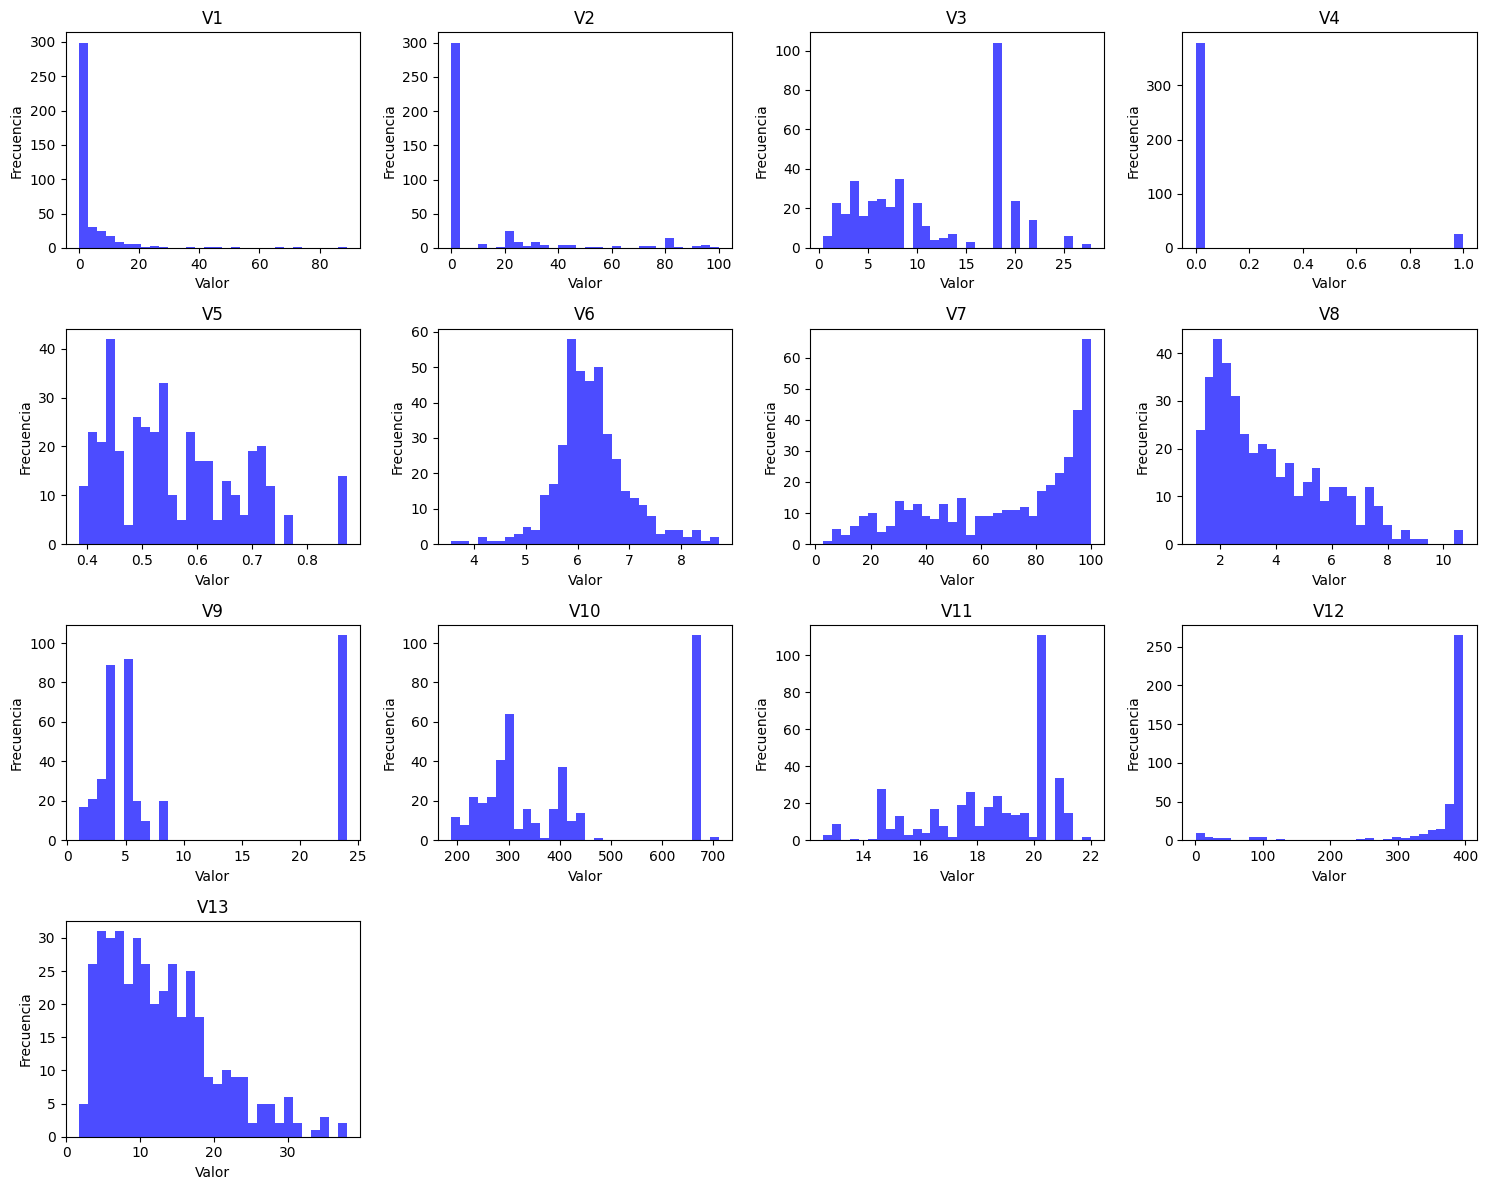

In [22]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 12))

# Crear histogramas para cada variable
for i, column in enumerate(caracteristicas_df.columns):
    plt.subplot(4, 4, i + 1)  # 4 filas, 4 columnas de subgráficas
    plt.hist(caracteristicas_df[column], bins=30, alpha=0.7, color='blue')
    plt.title(column)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()  # Ajustar el diseño
plt.show()

Podemos ver determinar que cada variables que manejar rangos entre 0 y 1 o tambien entre 0 y 100 entonces podriamos determinar que son variables que estan manejando proporciones pero se estan escribiendo en diferentes magnitudes como los son V1, V2, V5 Y V7, por otro lado la variable V4 tiene valores de 0 y 1 entonces podemos asumir que hacer refrencia a una variable categorica, adicionalmente la demas variables tiene valores postiivos que se puede traducir en tasas, indices o distancias. Peor cada destacar comportamientos interesente como por ejemplo V6, las distirbucion de los datos son bastante simetricos que se podria hasta determinar cierta normalidad en esas vairables, por otro lado existe variables que tienes sesgo hacia la derecha V1, V2, V5, V8, V9 y V12 y por el otr son variables con sesgo hacia la izquierda y en general debido a estos sesgos se puede evidenciar una variabilidad notables en la gran mayoria de caracteristicas. 

2. Prepare sus datos para que puedan ser recibidos por una red neuronal (como usted habrá visto, los valores de cada una de las entradas de sus vectores parecen tener
rangos diversos). En este tipo de situaciones se suele normalizar los datos (restar la media y dividir por la desviación estándar de cada una de los “features” del conjunto de entrenamiento). Los datos de prueba también se normalizan utilizando las medias y desviaciones
estándar del conjunto de entrenamiento.

A continuacion tabajaremos las matrices y los vectores inciales y como siguiente paso se mostrara en la proxima celda se manipularan los datos con lo explicado en el inciso.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

print("Datos de entrenamiento normalizados:")
print(train_data_scaled[:2])

print("\nDatos de prueba normalizados:")
print(test_data_scaled[:2])

Datos de entrenamiento normalizados:
[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]]

Datos de prueba normalizados:
[[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
   1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
   2.25092074]
 [-0.39242675 -0.48361547 -0.16087773 -0.25683275 -0.08840061 -0.49947436
   0.85606329 -0.68396235 -0.39603557  0.15707841 -0.30759583  0.42733126
   0.47880119]]


Con la funciones 'scaler.fit_transform' y 'scaler.transform' hacemos la normalizacion de los datos y al imprimir los primeros datos comprobamos que las magnitiudes de los datos han cambiado y oscilan los valores entre -3 y 3 y un valor excede ese valor puede ser que tiene un magnitud muy baja o alta comparados con los demás datos por lo que podemos asumir que se puede tratar de un dato atipico. 

3. Utilizando Keras, implemente diferentes tipos de redes con diferentes activaciones y arquitecturas pero sin ningun m etodo de regularizacion. Experimente tambien
con los optimizadores mas frecuentes. Tenga en cuenta que la activacion de la ultima capa debe ser lineal, o a lo sumo ser ReLU o alguna variante de ReLU que no tenga cotas superiores. Si utiliza estas activaciones puede utilizar la funcion de costo o perdida de error cuadratico medio (MSE). Describa sus resultados.
Sugerencia: Como esta implıcitamente probando varios hiperparametros y su conjunto es pequeno, puede utilizar validacion cruzada (cross-validation).

En este caso, vamos a trabajar con varias redes, para pode hacerlas comparabales y determinar de que manera podemos trabajar sin metodos de regulaizacion aun, las redes a trabajar seran la siguientes:

**Modelo 1)**
Dos capas ocultas de 16 neuronas, funcion de activacion Relu y optimizador Adam
**Modelo 2)** 
Dos capas ocultas de 32 neuronas, funcion de activacion Relu y optimizador Adam
**Modelo 3)** 
Tres capas ocultas de 32 neuronas, funcion de activacion Relu y optimizador Adam
**Modelo 4)** 
Tres capas ocultas de 32 neuronas, funcion de activacion Selu y optimizador Adam
**Modelo 5)** 
Tres capas ocultas de 32 neuronas, funcion de activacion Elu y optimizador Adam
**Modelo 6)** 
Tres capas ocultas de 32 neuronas, funcion de activacion Elu y optimizador RMSprop
**Modelo 7)** 
Tres capas ocultas de 32 neuronas, funcion de activacion Elu y optimizador SGD
**Modelo 8)** 
Tres capas ocultas de 64 neuronas, funcion de activacion Elu y optimizador Adam

In [36]:
# Dividir el conjunto de prueba en validación y prueba
x_val, x_test, y_val, y_test = train_test_split(test_data, test_targets, test_size=0.3, random_state=42)


In [39]:
# Función para calcular las métricas
def calcular_metricas(model, x, y_true):
    y_pred = model.predict(x)
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return rmse

# Definir las arquitecturas
arquitecturas = [
    {"capas": [16, 16], "activacion": "relu", "optimizador": Adam()},
    {"capas": [32, 32], "activacion": "relu", "optimizador": Adam()},
    {"capas": [32, 32, 32], "activacion": "relu", "optimizador": Adam()},
    {"capas": [32, 32, 32], "activacion": "selu", "optimizador": Adam()},
    {"capas": [32, 32, 32], "activacion": "elu", "optimizador": Adam()},
    {"capas": [32, 32, 32], "activacion": "elu", "optimizador":  RMSprop()},
    {"capas": [32, 32, 32], "activacion": "elu", "optimizador":  SGD()},
    {"capas": [64, 64, 64], "activacion": "elu", "optimizador": Adam()},
    
]

# Tabla para almacenar resultados
resultados = []

# Entrenar los modelos
for idx, config in enumerate(arquitecturas):
    print(f"Entrenando Modelo {idx + 1}...")
    
    # Construir el modelo
    model = models.Sequential()
    model.add(layers.Dense(config["capas"][0], activation=config["activacion"], input_shape=(13,)))
    
    for capa in config["capas"][1:]:
        model.add(layers.Dense(capa, activation=config["activacion"]))
    
    model.add(layers.Dense(1, activation='relu'))
    
    model.compile(optimizer=config["optimizador"], loss='mean_squared_error', metrics=['mean_squared_error'])
    
    # Entrenar el modelo
    model.fit(train_data_scaled, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=2)
    
    # Calcular métricas en validación
    rmse_val = calcular_metricas(model, x_val, y_val)
    
    # Calcular métricas en prueba
    rmse_test = calcular_metricas(model, x_test, y_test)
    
    # Guardar resultados
    resultados.append({
        "Modelo": f"Modelo {idx + 1}",
        "RMSE Validación": rmse_val,
        "RMSE Prueba": rmse_test,
    
    })
    
# Convertir a DataFrame y mostrar los resultados
df_resultados = pd.DataFrame(resultados)
df_resultados

Entrenando Modelo 1...
Epoch 1/10


c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 574.3152 - mean_squared_error: 574.3152 - val_loss: 580.3700 - val_mean_squared_error: 580.3700
Epoch 2/10
1/1 - 0s - 79ms/step - loss: 573.3670 - mean_squared_error: 573.3670 - val_loss: 524.1203 - val_mean_squared_error: 524.1203
Epoch 3/10
1/1 - 0s - 72ms/step - loss: 572.4028 - mean_squared_error: 572.4028 - val_loss: 466.5106 - val_mean_squared_error: 466.5106
Epoch 4/10
1/1 - 0s - 71ms/step - loss: 571.4188 - mean_squared_error: 571.4188 - val_loss: 412.2396 - val_mean_squared_error: 412.2396
Epoch 5/10
1/1 - 0s - 75ms/step - loss: 570.4170 - mean_squared_error: 570.4170 - val_loss: 359.9008 - val_mean_squared_error: 359.9008
Epoch 6/10
1/1 - 0s - 80ms/step - loss: 569.4052 - mean_squared_error: 569.4052 - val_loss: 311.4167 - val_mean_squared_error: 311.4167
Epoch 7/10
1/1 - 0s - 69ms/step - loss: 568.3790 - mean_squared_error: 568.3790 - val_loss: 271.7889 - val_mean_squared_error: 271.7889
Epoch 8/10
1/1 - 0s - 66ms/step - loss: 567.3312 - mean_squar

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 - 2s - 2s/step - loss: 568.7207 - mean_squared_error: 568.7207 - val_loss: 334.7056 - val_mean_squared_error: 334.7056
Epoch 2/10
1/1 - 0s - 75ms/step - loss: 566.7659 - mean_squared_error: 566.7659 - val_loss: 603.3785 - val_mean_squared_error: 603.3785
Epoch 3/10
1/1 - 0s - 85ms/step - loss: 564.7861 - mean_squared_error: 564.7861 - val_loss: 1008.5954 - val_mean_squared_error: 1008.5954
Epoch 4/10
1/1 - 0s - 80ms/step - loss: 562.7865 - mean_squared_error: 562.7865 - val_loss: 1552.4969 - val_mean_squared_error: 1552.4969
Epoch 5/10
1/1 - 0s - 74ms/step - loss: 560.7645 - mean_squared_error: 560.7645 - val_loss: 2240.5117 - val_mean_squared_error: 2240.5117
Epoch 6/10
1/1 - 0s - 79ms/step - loss: 558.7299 - mean_squared_error: 558.7299 - val_loss: 3076.8887 - val_mean_squared_error: 3076.8887
Epoch 7/10
1/1 - 0s - 74ms/step - loss: 556.6806 - mean_squared_error: 556.6806 - val_loss: 4073.6973 - val_mean_squared_error: 4073.6973
Epoch 8/10
1/1 - 0s - 74ms/step - loss: 

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 585.2115 - mean_squared_error: 585.2115 - val_loss: 324.8478 - val_mean_squared_error: 324.8478
Epoch 2/10
1/1 - 0s - 72ms/step - loss: 584.4747 - mean_squared_error: 584.4747 - val_loss: 178.1725 - val_mean_squared_error: 178.1725
Epoch 3/10
1/1 - 0s - 171ms/step - loss: 583.4357 - mean_squared_error: 583.4357 - val_loss: 103.9851 - val_mean_squared_error: 103.9851
Epoch 4/10
1/1 - 0s - 69ms/step - loss: 582.1284 - mean_squared_error: 582.1284 - val_loss: 107.2638 - val_mean_squared_error: 107.2638
Epoch 5/10
1/1 - 0s - 76ms/step - loss: 580.5776 - mean_squared_error: 580.5776 - val_loss: 204.4830 - val_mean_squared_error: 204.4830
Epoch 6/10
1/1 - 0s - 78ms/step - loss: 578.8882 - mean_squared_error: 578.8882 - val_loss: 404.3173 - val_mean_squared_error: 404.3173
Epoch 7/10
1/1 - 0s - 71ms/step - loss: 577.0087 - mean_squared_error: 577.0087 - val_loss: 711.8717 - val_mean_squared_error: 711.8717
Epoch 8/10
1/1 - 0s - 73ms/step - loss: 574.9954 - mean_squa

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 564.2493 - mean_squared_error: 564.2493 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 78ms/step - loss: 559.1033 - mean_squared_error: 559.1033 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 3/10
1/1 - 0s - 71ms/step - loss: 553.3566 - mean_squared_error: 553.3566 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 4/10
1/1 - 0s - 68ms/step - loss: 547.1757 - mean_squared_error: 547.1757 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 5/10
1/1 - 0s - 72ms/step - loss: 540.7106 - mean_squared_error: 540.7106 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 6/10
1/1 - 0s - 75ms/step - loss: 534.0350 - mean_squared_error: 534.0350 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 7/10
1/1 - 0s - 76ms/step - loss: 527.2906 - mean_squared_error: 527.2906 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 8/10
1/1 - 0s - 160ms/step - loss: 520.4858 - mean_squa

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 580.9601 - mean_squared_error: 580.9601 - val_loss: 594.7963 - val_mean_squared_error: 594.7963
Epoch 2/10
1/1 - 0s - 74ms/step - loss: 579.3669 - mean_squared_error: 579.3669 - val_loss: 604.8449 - val_mean_squared_error: 604.8449
Epoch 3/10
1/1 - 0s - 69ms/step - loss: 577.5983 - mean_squared_error: 577.5983 - val_loss: 640.6287 - val_mean_squared_error: 640.6287
Epoch 4/10
1/1 - 0s - 67ms/step - loss: 575.7302 - mean_squared_error: 575.7302 - val_loss: 713.6705 - val_mean_squared_error: 713.6705
Epoch 5/10
1/1 - 0s - 68ms/step - loss: 573.7803 - mean_squared_error: 573.7803 - val_loss: 825.4435 - val_mean_squared_error: 825.4435
Epoch 6/10
1/1 - 0s - 70ms/step - loss: 571.7957 - mean_squared_error: 571.7957 - val_loss: 976.2911 - val_mean_squared_error: 976.2911
Epoch 7/10
1/1 - 0s - 68ms/step - loss: 569.7886 - mean_squared_error: 569.7886 - val_loss: 1166.0850 - val_mean_squared_error: 1166.0850
Epoch 8/10
1/1 - 0s - 69ms/step - loss: 567.7408 - mean_squ

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 1s/step - loss: 580.5644 - mean_squared_error: 580.5644 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 76ms/step - loss: 576.0327 - mean_squared_error: 576.0327 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 3/10
1/1 - 0s - 69ms/step - loss: 571.4326 - mean_squared_error: 571.4326 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 4/10
1/1 - 0s - 69ms/step - loss: 566.6764 - mean_squared_error: 566.6764 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 5/10
1/1 - 0s - 74ms/step - loss: 561.1208 - mean_squared_error: 561.1208 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 6/10
1/1 - 0s - 75ms/step - loss: 554.4833 - mean_squared_error: 554.4833 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 7/10
1/1 - 0s - 67ms/step - loss: 546.8040 - mean_squared_error: 546.8040 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 8/10
1/1 - 0s - 82ms/step - loss: 537.8547 - mean_squar

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 1s/step - loss: 570.3397 - mean_squared_error: 570.3397 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 63ms/step - loss: 409.5942 - mean_squared_error: 409.5942 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 3/10
1/1 - 0s - 68ms/step - loss: 266.7285 - mean_squared_error: 266.7285 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 4/10
1/1 - 0s - 98ms/step - loss: 542.1914 - mean_squared_error: 542.1914 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 5/10
1/1 - 0s - 84ms/step - loss: 463.8989 - mean_squared_error: 463.8989 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 6/10
1/1 - 0s - 95ms/step - loss: 351.3958 - mean_squared_error: 351.3958 - val_loss: 168.9068 - val_mean_squared_error: 168.9068
Epoch 7/10
1/1 - 0s - 63ms/step - loss: 196.5840 - mean_squared_error: 196.5840 - val_loss: 12743.6758 - val_mean_squared_error: 12743.6758
Epoch 8/10
1/1 - 0s - 56ms/step - loss: 67.6056 - mean_sq

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 583.2185 - mean_squared_error: 583.2185 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 67ms/step - loss: 576.8090 - mean_squared_error: 576.8090 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 3/10
1/1 - 0s - 61ms/step - loss: 569.6144 - mean_squared_error: 569.6144 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 4/10
1/1 - 0s - 66ms/step - loss: 562.1776 - mean_squared_error: 562.1776 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 5/10
1/1 - 0s - 68ms/step - loss: 554.6383 - mean_squared_error: 554.6383 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 6/10
1/1 - 0s - 61ms/step - loss: 547.0328 - mean_squared_error: 547.0328 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 7/10
1/1 - 0s - 63ms/step - loss: 539.3246 - mean_squared_error: 539.3246 - val_loss: 680.9295 - val_mean_squared_error: 680.9295
Epoch 8/10
1/1 - 0s - 63ms/step - loss: 531.4811 - mean_squar

,Modelo,RMSE Validación,RMSE Prueba
0,Modelo 1,14.230115,10.020816
1,Modelo 2,90.306811,95.467486
2,Modelo 3,49.021987,50.860941
3,Modelo 4,26.094625,21.606085
4,Modelo 5,44.471632,49.820335
5,Modelo 6,26.094625,21.606085
6,Modelo 7,282.717722,278.786086
7,Modelo 8,26.058644,21.606085


Al trabajar estos 8 modelos realizamos una pequeña comparacion si trabajamos varias neuronas, varias capas, diferentes funciones de activacion y diferentes optimizadores podemos decir que el que tiene mejor rendimiento es el primer modelo que tiene una arquitectura bastante simple pero suficiente para la funciones de perdida sea minima y al comparar los valores de validacion y de prueba no estan muy alejados entonces tiene metricas que nos determina que los modelos no estan sufriendo de sobreajuste.  Por otro lado el modelos 4, 6, 8 nos presenta metricas similares nos determina que la funcion Selu tambien puede funcionar como funcion de activacion y que no hay mucha diferencias al usar diferentes optimizadores al menos en este caso. Estos 4 modelos que tuvieron mejores resultados los usaremos para el siguiente punto.

4.  Implemente metodos de regularizacion vistos en clase para mejorar su aprendizaje. Describa sus resultados

Para ellos nos traemos las arquitecturas del punto anterior y les aplicamos metodos de regularizacion ya sea L1 o L2 y determinemos si mejoro el aprendizaje de la red:

In [42]:
# Definir las arquitecturas con regularización
arquitecturas_regularizadas = [
    {"capas": [16, 16], "activacion": "relu", "optimizador": Adam(), "regularizacion": l1(0.01)},
    {"capas": [32, 32, 32], "activacion": "selu", "optimizador": Adam(), "regularizacion": l1(0.01)},
    {"capas": [32, 32, 32], "activacion": "elu", "optimizador":  RMSprop(), "regularizacion": l1(0.01)},
    {"capas": [64, 64, 64], "activacion": "elu", "optimizador": Adam(), "regularizacion": l1(0.01)},
    {"capas": [16, 16], "activacion": "relu", "optimizador": Adam(), "regularizacion": l2(0.01)},
    {"capas": [32, 32, 32], "activacion": "selu", "optimizador": Adam(), "regularizacion": l2(0.01)},
    {"capas": [32, 32, 32], "activacion": "elu", "optimizador":  RMSprop(), "regularizacion": l2(0.01)},
    {"capas": [64, 64, 64], "activacion": "elu", "optimizador": Adam(), "regularizacion": l2(0.01)},
]

# Tabla para almacenar resultados
resultados_regularizacion = []

# Entrenar los modelos con regularización
for idx, config in enumerate(arquitecturas_regularizadas):
    print(f"Entrenando Modelo {idx + 1} con regularización...")
    
    # Construir el modelo
    model = models.Sequential()
    model.add(layers.Dense(config["capas"][0], activation=config["activacion"], input_shape=(13,),
                           kernel_regularizer=config["regularizacion"]))
    
    for capa in config["capas"][1:]:
        model.add(layers.Dense(capa, activation=config["activacion"], kernel_regularizer=config["regularizacion"]))
    
    model.add(layers.Dense(1, activation='relu'))
    
    model.compile(optimizer=config["optimizador"], loss='mean_squared_error', metrics=['mean_squared_error'])
    
    # Entrenar el modelo
    model.fit(train_data_scaled, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=2)
    
    # Calcular métricas en validación
    rmse_val = calcular_metricas(model, x_val, y_val)
    
    # Calcular métricas en prueba
    rmse_test = calcular_metricas(model, x_test, y_test)
    
    # Guardar resultados
    resultados_regularizacion.append({
        "Modelo": f"Modelo {idx + 1}",
        "RMSE Validación": rmse_val,
        "RMSE Prueba": rmse_test,
    })

# Convertir a DataFrame y mostrar los resultados
df_resultados_regularizacion = pd.DataFrame(resultados_regularizacion)
df_resultados_regularizacion


Entrenando Modelo 1 con regularización...
Epoch 1/10


c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 560.7668 - mean_squared_error: 559.7598 - val_loss: 8942.4424 - val_mean_squared_error: 8941.4355
Epoch 2/10
1/1 - 0s - 99ms/step - loss: 559.4869 - mean_squared_error: 558.4798 - val_loss: 9319.8936 - val_mean_squared_error: 9318.8867
Epoch 3/10
1/1 - 0s - 91ms/step - loss: 558.1921 - mean_squared_error: 557.1847 - val_loss: 9706.8418 - val_mean_squared_error: 9705.8350
Epoch 4/10
1/1 - 0s - 89ms/step - loss: 556.8892 - mean_squared_error: 555.8815 - val_loss: 10102.9854 - val_mean_squared_error: 10101.9775
Epoch 5/10
1/1 - 0s - 96ms/step - loss: 555.5842 - mean_squared_error: 554.5762 - val_loss: 10508.3105 - val_mean_squared_error: 10507.3027
Epoch 6/10
1/1 - 0s - 88ms/step - loss: 554.2735 - mean_squared_error: 553.2653 - val_loss: 10921.4922 - val_mean_squared_error: 10920.4834
Epoch 7/10
1/1 - 0s - 88ms/step - loss: 552.9606 - mean_squared_error: 551.9520 - val_loss: 11343.0479 - val_mean_squared_error: 11342.0381
Epoch 8/10
1/1 - 0s - 94ms/step - loss:

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 570.0346 - mean_squared_error: 566.0936 - val_loss: 684.8699 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 118ms/step - loss: 567.1355 - mean_squared_error: 563.1951 - val_loss: 684.8692 - val_mean_squared_error: 680.9295
Epoch 3/10
1/1 - 0s - 89ms/step - loss: 564.1854 - mean_squared_error: 560.2457 - val_loss: 684.8687 - val_mean_squared_error: 680.9295
Epoch 4/10
1/1 - 0s - 82ms/step - loss: 561.1516 - mean_squared_error: 557.2125 - val_loss: 684.8683 - val_mean_squared_error: 680.9295
Epoch 5/10
1/1 - 0s - 83ms/step - loss: 558.0684 - mean_squared_error: 554.1296 - val_loss: 684.8682 - val_mean_squared_error: 680.9295
Epoch 6/10
1/1 - 0s - 84ms/step - loss: 554.9442 - mean_squared_error: 551.0054 - val_loss: 684.8682 - val_mean_squared_error: 680.9295
Epoch 7/10
1/1 - 0s - 87ms/step - loss: 551.7386 - mean_squared_error: 547.7999 - val_loss: 684.8684 - val_mean_squared_error: 680.9295
Epoch 8/10
1/1 - 0s - 86ms/step - loss: 548.3990 - mean_squa

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 581.2859 - mean_squared_error: 577.4127 - val_loss: 11512.3555 - val_mean_squared_error: 11508.4814
Epoch 2/10
1/1 - 0s - 114ms/step - loss: 574.6597 - mean_squared_error: 570.7845 - val_loss: 16307.1729 - val_mean_squared_error: 16303.2920
Epoch 3/10
1/1 - 0s - 97ms/step - loss: 566.9791 - mean_squared_error: 563.0999 - val_loss: 21108.4492 - val_mean_squared_error: 21104.5664
Epoch 4/10
1/1 - 0s - 92ms/step - loss: 557.3927 - mean_squared_error: 553.5098 - val_loss: 25705.8164 - val_mean_squared_error: 25701.9297
Epoch 5/10
1/1 - 0s - 99ms/step - loss: 547.3639 - mean_squared_error: 543.4775 - val_loss: 29828.4375 - val_mean_squared_error: 29824.5488
Epoch 6/10
1/1 - 0s - 89ms/step - loss: 538.1948 - mean_squared_error: 534.3050 - val_loss: 33324.6680 - val_mean_squared_error: 33320.7773
Epoch 7/10
1/1 - 0s - 100ms/step - loss: 529.0858 - mean_squared_error: 525.1928 - val_loss: 36192.2227 - val_mean_squared_error: 36188.3281
Epoch 8/10
1/1 - 0s - 165ms/ste

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 3s - 3s/step - loss: 584.8525 - mean_squared_error: 574.8287 - val_loss: 690.9532 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 119ms/step - loss: 576.2016 - mean_squared_error: 566.1779 - val_loss: 690.9535 - val_mean_squared_error: 680.9295
Epoch 3/10
1/1 - 0s - 104ms/step - loss: 567.1521 - mean_squared_error: 557.1281 - val_loss: 690.9543 - val_mean_squared_error: 680.9295
Epoch 4/10
1/1 - 0s - 129ms/step - loss: 557.9559 - mean_squared_error: 547.9312 - val_loss: 690.9559 - val_mean_squared_error: 680.9295
Epoch 5/10
1/1 - 0s - 130ms/step - loss: 548.6732 - mean_squared_error: 538.6469 - val_loss: 690.9581 - val_mean_squared_error: 680.9295
Epoch 6/10
1/1 - 0s - 108ms/step - loss: 539.3144 - mean_squared_error: 529.2858 - val_loss: 690.9608 - val_mean_squared_error: 680.9295
Epoch 7/10
1/1 - 0s - 108ms/step - loss: 529.9095 - mean_squared_error: 519.8782 - val_loss: 690.9640 - val_mean_squared_error: 680.9295
Epoch 8/10
1/1 - 0s - 110ms/step - loss: 520.4611 - mea

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 571.3620 - mean_squared_error: 571.0867 - val_loss: 191.5092 - val_mean_squared_error: 191.2338
Epoch 2/10
1/1 - 0s - 61ms/step - loss: 570.2791 - mean_squared_error: 570.0037 - val_loss: 214.4186 - val_mean_squared_error: 214.1431
Epoch 3/10
1/1 - 0s - 55ms/step - loss: 569.1756 - mean_squared_error: 568.9001 - val_loss: 243.5394 - val_mean_squared_error: 243.2638
Epoch 4/10
1/1 - 0s - 54ms/step - loss: 568.0497 - mean_squared_error: 567.7741 - val_loss: 278.8587 - val_mean_squared_error: 278.5831
Epoch 5/10
1/1 - 0s - 58ms/step - loss: 566.9041 - mean_squared_error: 566.6284 - val_loss: 320.6696 - val_mean_squared_error: 320.3939
Epoch 6/10
1/1 - 0s - 75ms/step - loss: 565.7401 - mean_squared_error: 565.4643 - val_loss: 369.3022 - val_mean_squared_error: 369.0263
Epoch 7/10
1/1 - 0s - 76ms/step - loss: 564.5609 - mean_squared_error: 564.2849 - val_loss: 424.7610 - val_mean_squared_error: 424.4850
Epoch 8/10
1/1 - 0s - 75ms/step - loss: 563.3620 - mean_squar

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 561.2668 - mean_squared_error: 560.4510 - val_loss: 2160.2871 - val_mean_squared_error: 2159.4709
Epoch 2/10
1/1 - 0s - 70ms/step - loss: 555.3765 - mean_squared_error: 554.5604 - val_loss: 2019.6343 - val_mean_squared_error: 2018.8177
Epoch 3/10
1/1 - 0s - 68ms/step - loss: 548.9286 - mean_squared_error: 548.1121 - val_loss: 1879.8342 - val_mean_squared_error: 1879.0176
Epoch 4/10
1/1 - 0s - 61ms/step - loss: 542.1962 - mean_squared_error: 541.3793 - val_loss: 1743.4023 - val_mean_squared_error: 1742.5851
Epoch 5/10
1/1 - 0s - 71ms/step - loss: 535.1507 - mean_squared_error: 534.3334 - val_loss: 1613.8981 - val_mean_squared_error: 1613.0804
Epoch 6/10
1/1 - 0s - 74ms/step - loss: 527.9407 - mean_squared_error: 527.1231 - val_loss: 1490.3405 - val_mean_squared_error: 1489.5225
Epoch 7/10
1/1 - 0s - 73ms/step - loss: 520.6884 - mean_squared_error: 519.8703 - val_loss: 1371.1525 - val_mean_squared_error: 1370.3339
Epoch 8/10
1/1 - 0s - 82ms/step - loss: 513.413

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 581.5823 - mean_squared_error: 580.7552 - val_loss: 681.7568 - val_mean_squared_error: 680.9295
Epoch 2/10
1/1 - 0s - 88ms/step - loss: 576.3094 - mean_squared_error: 575.4821 - val_loss: 676.5277 - val_mean_squared_error: 675.6994
Epoch 3/10
1/1 - 0s - 83ms/step - loss: 571.8812 - mean_squared_error: 571.0529 - val_loss: 644.1113 - val_mean_squared_error: 643.2816
Epoch 4/10
1/1 - 0s - 89ms/step - loss: 567.5235 - mean_squared_error: 566.6937 - val_loss: 569.9122 - val_mean_squared_error: 569.0808
Epoch 5/10
1/1 - 0s - 74ms/step - loss: 562.9175 - mean_squared_error: 562.0861 - val_loss: 459.9652 - val_mean_squared_error: 459.1320
Epoch 6/10
1/1 - 0s - 72ms/step - loss: 558.1604 - mean_squared_error: 557.3272 - val_loss: 368.2032 - val_mean_squared_error: 367.3681
Epoch 7/10
1/1 - 0s - 77ms/step - loss: 553.0675 - mean_squared_error: 552.2324 - val_loss: 295.0658 - val_mean_squared_error: 294.2287
Epoch 8/10
1/1 - 0s - 78ms/step - loss: 547.3193 - mean_squar

c:\Users\Manuel Sanchez\Desktop\ANDES\MODELOS AVANZADOS PARA ANALISIS DE DATOS II\modelos_avanzados_deep_learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 577.8638 - mean_squared_error: 576.3621 - val_loss: 679.0574 - val_mean_squared_error: 677.5552
Epoch 2/10
1/1 - 0s - 88ms/step - loss: 570.9185 - mean_squared_error: 569.4163 - val_loss: 574.9456 - val_mean_squared_error: 573.4427
Epoch 3/10
1/1 - 0s - 93ms/step - loss: 563.5917 - mean_squared_error: 562.0888 - val_loss: 396.7083 - val_mean_squared_error: 395.2047
Epoch 4/10
1/1 - 0s - 92ms/step - loss: 556.1227 - mean_squared_error: 554.6191 - val_loss: 253.0642 - val_mean_squared_error: 251.5595
Epoch 5/10
1/1 - 0s - 120ms/step - loss: 548.5162 - mean_squared_error: 547.0115 - val_loss: 155.1376 - val_mean_squared_error: 153.6317
Epoch 6/10
1/1 - 0s - 86ms/step - loss: 540.7089 - mean_squared_error: 539.2029 - val_loss: 104.3270 - val_mean_squared_error: 102.8196
Epoch 7/10
1/1 - 0s - 77ms/step - loss: 532.7282 - mean_squared_error: 531.2209 - val_loss: 101.0832 - val_mean_squared_error: 99.5743
Epoch 8/10
1/1 - 0s - 76ms/step - loss: 524.5356 - mean_squar

,Modelo,RMSE Validación,RMSE Prueba
0,Modelo 1,112.506100,114.146946
1,Modelo 2,26.094625,21.606085
2,Modelo 3,214.926711,210.923988
3,Modelo 4,26.094625,21.606085
4,Modelo 5,25.181514,26.335748
5,Modelo 6,32.604814,28.493787
6,Modelo 7,14.134749,13.030630
7,Modelo 8,19.356229,21.170205


En estos resultados podemos ver que los primeros 4 modelos trabajaron un modelo de regularizacion l1 y los otros 4 modelos siguientes con regularizacion l2, podemos ver que en estas redes en general presentaron mejores resultado esas redes trabajadas con la regularizacion l2, posteriormente el modelo 5, 6, 7, 8 tiene en general buenos desempeños pero lo que mas destaca que es el modelo 7 que son 3 capas ocultas de 32 neuronas funcion ely, optimizado RMSprop y regularizacion l2. Ya que la funcion de perdida es menor al resultado que arrojo el modelo 1 del punto 3 que tenia una arquitectura mas simple. Por lo que se puede trabajar ambos debido a que el modelo 7 de este punto no presenta un costo computacional tan alto, optaria por trabajar con el. Cabe mencionar existen combinaciones mas complejas para trabajar estas redes pero llegara un punto la mejoria no es considerable entonces debemos optar por el modelo mas parsimonioso y que no sacrifiquemos un costo computacional bastante alto 
